### SVM(Support Vector Machine)

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=42)

In [8]:
from sklearn.svm import SVC

model = SVC()
model.fit(X_train,y_train)

model.score(X_test,y_test)

1.0

In [9]:
# 시각화를 위한 데이터 준비(데이터프레임 생성)
df = pd.DataFrame(iris_data.data[:,:2], columns=iris_data.feature_names[:2])
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [10]:
X = iris_data.data[:,:2]
y = iris_data.target
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [11]:
svm_clf = SVC(kernel="linear",C=1.0)

svm_clf.fit(X_train,y_train)

svm_clf.score(X_train,y_train),svm_clf.score(X_test,y_test)

(0.8, 0.9)

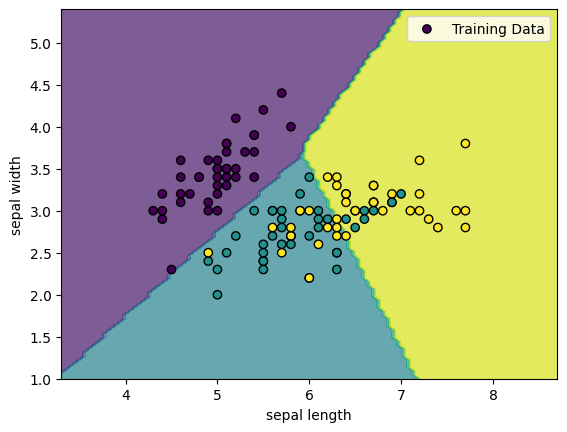

In [12]:
# Linear 시각화
from sklearn.inspection import DecisionBoundaryDisplay
# from_estimator : 모델로부터 가져온 데이터를 시각화하기 위해 호출하는 함수
DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolors='k',\
    label='Training Data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

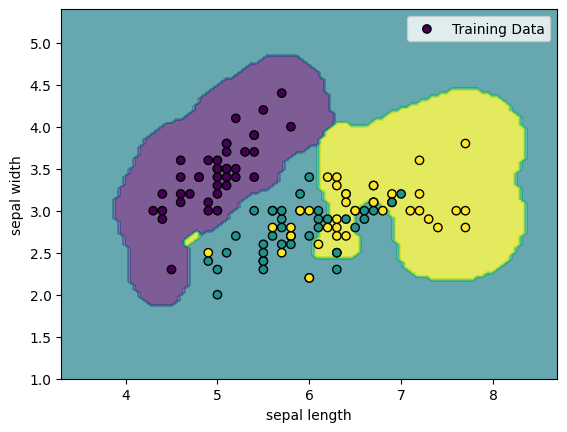

In [13]:
# RBF 시각화
# gamma : 감마의 값에 비례하게 복잡한 경계를 부여함함
svm_clf = SVC(kernel='rbf', C=1.0, gamma=10.5)
svm_clf.fit(X_train,y_train)
# svm_clf.score(X_test,y_test), svm_clf.score(X_train,y_train)

# from_estimator : 모델로부터 가져온 데이터를 시각화하기 위해 호출하는 함수
DecisionBoundaryDisplay.from_estimator(svm_clf, X_train, alpha=0.7)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,edgecolors='k',\
    label='Training Data')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

SVR (Suppoter Vector Regressor)

In [14]:
# 데이터 준비
np.random.seed(0)
X = np.sort(np.random.rand(40,1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1

X_test = np.linspace(0,5,100).reshape(-1,1)


In [15]:
# 모델 학습 및 예측
from sklearn.svm import SVR

svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')

# 학습
svr_rbf.fit(X,y)
svr_lin.fit(X,y)
svr_poly.fit(X,y)

#예측
rbf_pred = svr_rbf.predict(X_test)
lin_pred = svr_lin.predict(X_test)
poly_pred = svr_poly.predict(X_test)


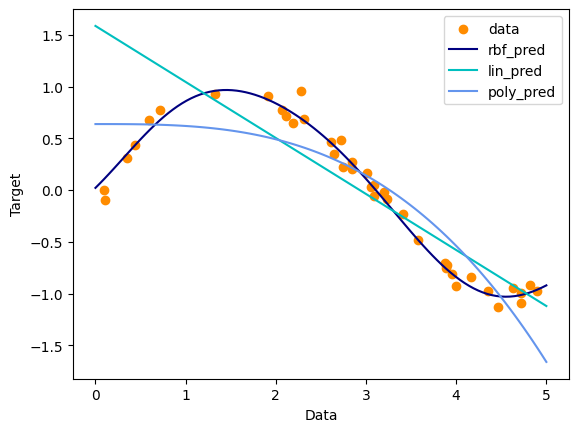

In [16]:
#시각화
plt.scatter(X,y, color='darkorange', label='data')
plt.plot(X_test, rbf_pred, color='navy', label='rbf_pred')
plt.plot(X_test, lin_pred, color='c', label='lin_pred')
plt.plot(X_test, poly_pred, color='cornflowerblue', label='poly_pred')

plt.xlabel('Data')
plt.ylabel('Target')
plt.legend()
plt.show()


### 캘리포니아 주택 가격 예측

In [17]:
#데이터 로드
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()


In [24]:
# 데이터 분리 및 스케일링
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = housing_data.data
y = housing_data.target

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size=0.2)

scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.fit_transform(X_test)

scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).ravel()
y_test_scaled = scaler_y.fit_transform(y_test.reshape(-1,1)).ravel()


In [25]:
# SVR 모델 훈련 및 평가
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# 학습
svr_model.fit(X_train_scaled,y_train_scaled)

y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1))

mse = mean_squared_error(y_test, y_pred)
mse


0.3796103713687019